# Introduction to Latent Variable Models and Variational Methods

## CSCI E-82A
### Stephen Elston

## Latent Variable Models

We refer to a probabilistic model with **hidden variables** a **latent variable model**. A latent variable model has three components:  

- **Visible or observed variables, $\nu$:** Data can be acquired for these variables from **emissions** of the values.
- **Hidden, unobserved, or latent variables, $h$:** The actual value of these variables is not observable and can only be estimated. 
- **Model parameters, $\theta$:** Are a vector of parameters which must be estimated for the model. 

In general, our goal is to find the joint distribution:   

$$p(\nu, h; \Theta)$$

## Mixture Models

A mixture model allows us to represent complex probability distributions. There are many real-world cases where a single distribution would not be an accurate representation. For example:

- Missing value problems may require a mixture of distributions. 
- An unscrupulous casino may alternate between using fair and 'loaded' dice. The distribution of numbers shown by these two types of dice are quite different. An observer trying to model the full distribution will need to use a mixture of the two.  
- Returns of many financial assets are dependent on overall market conditions. These returns might represent a specific log-normal distribution for a period of time, and then once investor sentiment changes, a different distribution.   
- Response rates to a promotional email offer might represent distributions for several populations. The offer might be for men's running shoes. One population of respondent is expected to be male athletes. However, the are other potential buyers who might be purchasing the shoes on behalf of a male athlete. There response rates of these populations could be quite different, and from just an email address there is no way to know which population each response comes from. 

Let, $\nu_i$ be a real-valued vector of observed values in $\mathbb{R}^d$, and $h_i \in \{1, 2, 3, \ldots, K \}$ be a discrete-valued hidden variable. We can represent a factorized DAG of the mixture model as: 

$$p(\nu, h) = p(\nu\ |\ h) p(h)$$

Where, $p(h = k) = \pi_k$, for some probabilities of each of the $K$ components of the mixture. 

### Gaussian Mixture Model

One of the most widely used mixture models is the **mixture of Gaussian distributions**. GMMs are used in many applications from engineering, medicine, and robot navigation. 

As the name implies the GMM is a mixture of *K* individual Gaussian distributions where the probability of the kth distribution is $\pi_k \in \{\pi_1, \pi_2, \ldots, \pi_K \}$. Each of the *K* distributions has a location parameter, $\mu_k \in \{\mu_1, \mu_2, \ldots, \mu_K\}$ and a covariance parameter, $\Sigma_k \in \{\Sigma_1, \Sigma_2, \ldots, \Sigma_K\}$. The parameter vector for one component of the latent variable model is then:  

$$\theta_k = (\mu_k, \mu_k, \Sigma_k)$$

The conditional probability distribution for a single component of the GMM can then be written:   

$$p(\nu\ |\ h = k) = \mathcal{N}(\nu; \mu_k, \Sigma_k)$$

What we actually observe is the marginal distribution of the visible variables. For the GMM we can find this marginal distribution as follows:  

$$p(x) = \sum_{k=1}^{K} p(\nu\ |\ h = k) p(h = k) =  \sum_{k=1}^{K} \pi_k \mathcal{N}(\nu; \mu_k, \Sigma_k)$$

Here, the hidden variable is marginalized out. The right hand term is the expectation of $p(x)$ for the mixture of Gaussians.

## Variational Bayes 

We need a way to perform inference to find the parameter vector, $\theta$ of the latent variable model, $p(\nu, h; \Theta)$. As has already been stated, there are no exact inference methods for latent variable problems. However, there are practical approximate methods, which often work well.     

The Monte Carlo method has been applied to latent variable problems for decades. More recently **variational methods** have been gaining popularity. There are several key differences between Monte Carlo methods and variational methods:    

- Variational methods are **computationally more efficient** than Monte Carlo methods. This fact, has lead to the growth in the use of variational methods.
- We can always know when a variational approximation method has converged. This is not the case with Monte Carlo methods. 
- Variational methods use **local optimization** and there is no guarantee the **global optimum** can ever be found. Whereas, Monte Carlo methods will generally find the globally optimal solution, eventually. This local convergence property is the price we pay for the efficiency of variational methods.  

### Review of Kullback-Leibler Divergence

Variational methods are based on the Kullback-Leibler divergence. Let's review some of the properties of the KL divergence.   

The KL divergence between two distributions, $p(x)$ and $q(x)$ is written:

$$\mathbb{D}_{KL}(P \parallel Q) = - \sum_{x} p(x)\ ln_b \frac{p(x)}{q(x)}$$   

Some key properties of the KL divergence include:   

- $\mathbb{D}_{KL}(P \parallel Q) \ge 0$ for all $p(x)$ and $q(x)$.
- $\mathbb{D}_{KL}(P \parallel Q) = 0$ if and only if $p(x)= q(x)$.
- KL divergence is not symmetric so, $\mathbb{D}_{KL}(P \parallel Q) \ne \mathbb{D}_{KL}(Q \parallel P)$. This is why the term **divergence** is applied and this quantity cannot be considered a distance metric. 

### The Variational Lower Bound

Our problem is the find the full vector of parameters, $\theta$, using just the data from the visible variables, $\nu$. The problem of finding the posterior distribution of $\theta$ given $\nu$ can be formulated as:   

$$p(\theta\ |\ \nu) \propto p(\nu\ |\ \theta) p(\theta) \propto \sum_h p(\nu, h\ |\ \theta) p(\theta)$$  

Where, $p(\theta)$ is the prior distribution of $\theta$. Since our goal is to find the value of $\theta$ that maximizes the likelihood, $p(\theta\ |\ \nu)$, we can work with proportional relationships and therefore not have to deal with the troublesome normalization $Z(\theta)$.

The variational approximation assumes that the joint conditional distribution can be factorized as follows:  

$$p(\nu, h\ |\ \theta) \approx q(h) q(\theta)$$

The variational approximation is achieved by finding a value of $\theta$ that minimizes the KL divergence between $p(h \theta\ |\ \nu)$ and $q(h) q(\theta)$. Using these terms, the expanded KL divergence, and the properties stated in the previous section we find:  

$$\mathbb{D}_{KL}(q(h) q(\theta) \parallel p(h, \theta\ |\ \nu)) = 
\mathbb{E}_{q(h)} \big[ log(q(h)) \big] + 
\mathbb{E}_{q(\theta)} \big[ log(q(\theta)) \big] -
\mathbb{E}_{q(h) q(\theta)} \big[ log(p(h, \nu, \theta)) \big]
\ge 0$$

Rearranging these terms we find the bound on $log(p(\nu))$:

$$log(p(\nu)) \ge 
-\mathbb{E}_{q(h)} \big[ log(q(h)) \big] -
\mathbb{E}_{q(\theta)} \big[ log(q(\theta)) \big] +
\mathbb{E}_{q(h) q(\theta)} \big[ log(p(h, \nu, \theta)) \big]$$  


From the above, you can see that we can maximize the likelihood of the joint distribution by minimizing the KL divergence of $(p(h, \nu, \theta)$ with respect to $q(h)$ and $q(\theta)$. Given the aforementioned factorization, this minimization can be achieved coordinate-wise, making the problem tractable. In fact, if we employ an algorithm that maximizes likelihood, it is clear from the above relationship that the bound will be reduced and the algorithm will converge. 

### The Variational EM Algorithm

There are two alternating steps in the variational algorithm. The first step improves the estimate of the values of the hidden variables, $h$. The second step improves the estimate of the model parameters, $\theta$. At each iteration the variational lower bound is reduced. The iterations continue until the algorithm converges.    

**The E-step:**   

We would like to maximize the likelihood for $h$. But, by definition, we cannot know the actual values of the hidden variables. However, we can compute an updated estimate, $q^{new}(h)$, using observed data, $p(\nu)$ and current estimates of $q(\theta)$ and $q^{old}(h)$.   

This process is often referred to as **hallucinating data**, since data for hidden variables is manufactured. This process is also known as the **E-step**, since it maximizes the expected value of $log(p(h, \nu; \theta))$. This can be accomplished by finding $q^{new}(h)$ that minimizes KL divergence:  

$$q^{new}(h) = \underset{q(h)}{argmin}\ \mathbb{D}_{KL}(q(h) q^{old}(\theta) \parallel p(h, \theta\ |\ \nu))$$


**The M-step:**   

Likewise, using the values of observed data, $\nu$ and current estimates of $q^{old}(\theta)$ and $q(h)$ we can compute an updated estimate of $q^{new}(\theta)$. This process is also known as the **M-Step**, since it maximizes the likelihood of $q(\theta)$. This step involves finding a $q^{new}(\theta)$ that minimizes KL divergence:

$$q^{new}(\theta) = \underset{q(\theta)}{argmin}\ \mathbb{D}_{KL}(q^{new}(h) q(\theta) \parallel p(h, \theta\ |\ \nu))$$

### Unconstrained Variational Solution

If we rearrange the terms in the above equation for the KL divergence for $q(h)$ and hold $q(\theta)$ constant and introduce the distribution $\tilde{p}(h)$, which is the marginal distribution of $h$ at a fixed $\theta$. This results in the following equation:  

$$
\mathbb{E}_{q(h)} \big[ log(q(h)) \big] -
\mathbb{E}_{q(h) q(\theta)} \big[ log(p(h, \nu, \theta)) \big] =
\mathbb{D}_{KL}(q(h)  \parallel \tilde{p}(h)) + Constant
$$

Where,   

$$\tilde{p}(h) = 
 \frac{1}{\tilde{Z}} exp \Big( \mathbb{E}_{q(\theta)} \big[ log(p(h, \nu, \theta)) \big] \Big)
$$   

Here, $\tilde{Z}$ is the normalization constant. 

The E-step and M-step are then:

**E-Step**  

In the E-step we hold $q(\theta)$ constant and vary $p(h)$ so that it equals $\tilde{p}(h)$, resulting in the following update relationship:

$$q(h) \propto  exp \Big( \mathbb{E}_{q(\theta)} \big[ log(p(h, \nu, \theta)) \big] \Big) 
\propto exp \Big( \mathbb{E}_{q(\theta)} \big[ log(p(h, \nu\ |\ \theta)) \big] \Big)$$

**M-Step**

Similarly for the M-step we hold $q(h)$ constant and vary $\theta$, resulting in the following update relationship:

$$q(\theta) \propto  exp \Big( \mathbb{E}_{q(h)} \big[ log(p(h, \nu, \theta)) \big] \Big)  
\propto p(\theta) exp \Big( \mathbb{E}_{q(h)} \big[ log(p(h, \nu\ |\ \theta)) \big] \Big)$$

## Variational EM Algorithm

We will now turn our attention to the **variational EM algorithm**. Our goal is to find a set of parameters, $\theta$, which maximize the marginal likelihood of the observed data values, $p(\nu\ |\ \theta)$. To do so we find the **variational distribution** of $p(\nu\ |\ h)$ which minimizes the KL divergence with respect to $p(\nu\ |\ h, \theta)$. This approach leads to the following **variational bound**:

$$
\mathbb{D}_{KL}(q(h\ |\ \nu) \parallel p(h\ |\ \nu, \theta)) = 
\mathbb{E}_{q(h\ |\ \nu)} \big[ log(q(h\ |\ \nu))  -
 log(p(h\ |\ \nu, \theta)) \big]
\ge 0
$$

We can express the distribution on the far right as:  

$$p(h\ |\ \nu, \theta) = \frac{p(h, \nu\ |\ \theta)}{p(\nu\ |\ \theta)}$$

Using the above two relationships, we can do some substitutions and rearrange terms to obtain a bound on the marginal likelihood: 

\begin{align}
p(\nu\ |\ \theta) &\ge -\mathbb{E}_{q(h\ |\ \nu)} \big[ log(q(h^n\ |\ \nu^n)) \big] +
\mathbb{E}_{q(h\ |\ \nu)} \big[ log(p(h, \nu\ |\  \theta)) \big] \\
&\ge - Entropy\ term + Energy\ term
\end{align}

These two terms are break the marginal distribution into two terms, entropy and energy. The energy term is also known as the **expected complete data log likelihood**. The energy term is the only one dependent on $\theta$. 

In the foregoing, we have only considered a single observation, $\nu$. Now, we will consider the situation where there are a set of observations, $\mathcal{V} \in \{\nu^1, \nu^2, \ldots, \nu^N\}$. For these multiple observations the above relationship can be written as follows .

$$
p(\mathcal{V}\ |\ \theta) \ge \tilde{\mathcal{L}}(q^*, \theta) \equiv -\sum_{n=1}^N \mathbb{E}_{q(h^n\ |\ \nu^n)} \big[ log(q(h^n\ |\ \nu^n)) \big] +
\sum_{n=1}^N \mathbb{E}_{q(h^n\ |\ \nu^n)} \big[ log(p(h^n, \nu^n\ |\  \theta)) \big] 
$$

Where $\tilde{\mathcal{L}}(q^*, \theta)$ is the likelihood of the variational distribution $q^*$ given $\theta$. The bound on this likelihood is exact when $q(h^n\ |\ \nu^n) = p(h^n, \nu^n\ |\  \theta)$, for $n \in \{1, 2, \ldots, N\}$.  



### Optimization with EM Algorithm

We need to optimize (minimize) this bound with respect to both $\theta$ and $q^*$. This is done using the **EM algorithm**. The log-likelihoods are increased at each step until convergence. The steps in this algorithms are:  

**E-Step:**    

For the E-step $\theta$ is fixed and we vary, $q(h^n\ \| \nu^n)$ to maximize the likelihood, $\tilde{\mathcal{L}}(q^*, \theta)$. We would like to maximize the likelihood for $h$. But, by definition, we cannot know the actual values of the hidden variables. However, we can compute an updated estimate, $q^{new}(h^n\ |\ \nu^n, \theta)$, using observed data, $p(\nu)$ and current estimates of $q(\theta)$.   

This process is often referred to as **hallucinating data**, since data for hidden variables are manufactured. This process is also known as the **E-step**, since it maximizes the expected value of $log(p(h, \nu; \theta))$. This can be accomplished by finding $q^{new}(h)$ that minimizes KL divergence:     

**M-Step:**    

Likewise, using the values of observed data, $\nu$ and the fixed current estimates of $q^{old}(h^n\ |\ \nu^n)$ we can compute an updated estimate of the parameters $\theta$. This process is also known as the **M-Step**, since it maximizes the likelihood of $\tilde{\mathcal{L}}(q^*, \theta)$. This step involves finding $\theta$ that maximizes the energy term:

$$
\sum_{n=1}^N \mathbb{E}_{q(h^n\ |\ \nu^n)} \big[ log(p(h^n, \nu^n\ |\  \theta)) \big]
$$  

The entropy term does not depend on $\theta$.

### EM as Special Case of Variational Bayes

The classical **expectation maximization** or **EM algorithm** is a **maximum likelihood** method for estimating parameters of latent variable model models. In contrast to variational Bayes, classical EM algorithms do not require the specification of a prior for $p(\theta)$, as one would expect from a maximum likelihood method.   

There is a close relationship between variational Bayes and classical EM algorithms. In fact, the classical EM algorithm is a special case of the variational Bayes algorithm with two conditions:

1. The result is the maximum likelihood value of the parameters, denoted as $\theta_*$.
2. A uniform or flat prior is assumed for $p(\theta)$.  

If we apply these two conditions to the variational bound we arrive at:   

$$log(p(\nu\ |\ \theta_*)) \ge 
-\mathbb{E}_{q(h)} \big[ log(q(h)) \big] -
\mathbb{E}_{q(h)} \big[ log(p(h, \nu, \theta_*)) \big] + Constant
$$  

Further, with the observation that 

This relationship leads to the following M-step update and E-step update.




## Density Estimation for Mixtures

For N visible data values, $\mathcal{V} = \{\nu^1, \nu^2, \ldots, \nu^N\}$, we can express the probability of each observation, $p(\nu_i)$, given the value of the hidden variable, $\pi_i$, is: 

$$p(\nu^1, \nu^2, \ldots, \nu^N) = \prod_{i=1}^N p(\nu_i\ |\ \pi_i) p(i)$$

Here, $p(i)$ is the probability that the observed value $\nu_i$ was generated by the ith distribution, $p(\nu_i\ |\ \pi_i)$.  

## The Gaussian Mixture Model

One of the most widely used mixture of distributions models in the Gaussian Mixture Model (GMM). This mixture is comprised of $N$, $D$ dimensional Gaussian distribution components. The ith component has two parameters:    

- $\mu_i$, the vector of means.   
- $S_i$, the covariance matrix.   

This leads to the Gaussian distribution:   

$$p(x\ |\ m_i, S_i) = \frac{1}{\sqrt{det(2 \pi S_i)}}  exp \Big[ -\frac{1}{2}(x - m_i)S_i^{-1}(x-m_i) \Big]$$

The probability distribution of the GMM is then given by:  

$$p(x) = \sum_{i=1}^H p(x\ |\ m_i, S_i) p(i)$$  

We can write the parameters $\theta = \{ m_i, S_i, p(i), i = 1, \ldots, H \}$, and the i.i.d. dataset $\chi = \{ x^1, \ldots, x^N\}$ the log-likelihood is:  

$$p(\chi\ |\ \theta) = \sum_{n=1}^N log \sum_{i=1}^H  \frac{1}{\sqrt{det(2 \pi S_i)}}  exp \Big[ -\frac{1}{2}(x - m_i)S_i^{-1}(x-m_i) \Big]$$

The probabilities of the components, $p(i)$, have the constraints:

$$
0.0 \ge p(i) \ge 1.0 \\
\sum_{i=1}^H p(i) = 0.0
$$

### EM for GMMs   

We can perform the optimization to find the parameters, $\theta$, by maximizing the log likelihood $log(p(\nu\ |\ \theta_*))$. Using the index i as the latent variable the energy component is:   

$$
\sum_{n=1}^N \mathbb{E}_{q(i|x^n)} \big[ log(p(x^n,i)) \big] = 
\sum_{n=1}^N \mathbb{E}_{q(i|x^n)} \big[ log(p(x^n | i)) log(i)\big]
$$

Using the Gaussian formulation the above relation becomes:   

$$
\sum_{n=1}^N p^{old}(i | x^n) \sum_{i=1}^H 
\Big[ -\frac{1}{2}(x - m_i)S_i^{-1}(x-m_i)  -\frac{1}{2} log(det(2 \pi S_i)) + log p(i)\Big]
$$

In [1]:
import numpy as np
import numpy.random as nr
from scipy.stats import multivariate_normal
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
steps = 40
x_values = np.arange(-2.0, 2.0, 0.1)
y_values = np.arange(-2.0, 2.0, 0.1)
x = np.empty((steps*steps,2))
for i,xv in enumerate(x_values):
    for j,yv in enumerate(y_values):
        x[steps*i+j:] = np.array([xv,yv])

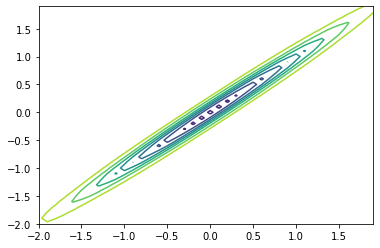

In [3]:
mean = np.array([0.0,0.0])
cov = np.array([[1.0, 0.99], [0.99, 1.0]])
gaussian_pdf = -multivariate_normal.pdf(x, mean=mean, cov = cov).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf)

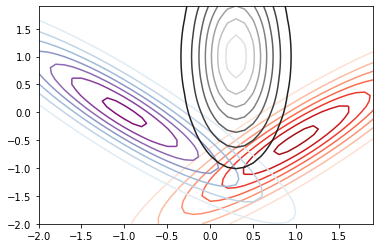

In [38]:
mean = np.array([-0.5,1.0])
cov = np.array([[1.0, 0.9], [.9, 1.0]])
gaussian_pdf1 = multivariate_normal.pdf(x, mean=mean, cov = cov).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf1, cmap=plt.get_cmap('Reds'))

mean = np.array([0.0,-1.0])
cov = np.array([[1.0, -0.9], [-0.9, 1.0]])
gaussian_pdf2 = 0.8*multivariate_normal.pdf(x, mean=mean, cov = cov).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf2, cmap=plt.get_cmap('BuPu'))

mean = np.array([1.0,0.3])
cov = np.array([[1.0, 0.0], [0.0,0.1]])
gaussian_pdf3 = 0.6*multivariate_normal.pdf(x, mean=mean, cov = cov).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf3, cmap=plt.get_cmap('gray'))

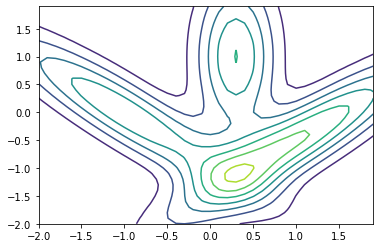

In [39]:
gaussian_pdf = np.add(np.add(gaussian_pdf1,gaussian_pdf2),gaussian_pdf3)
plt.contour(x_values, y_values, gaussian_pdf)